# HarvestStat Data Analysis - Burkina Faso

- The new data (April 11) is all "submitted" status, and only available with authentication. Without authentication, previous data (December 23) is retreived as "published" status.
- 

## Differences When Retrieving Data With and Without Authentication

In [5]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': ['R011','R012','R013','R014','R015','R016','R017','R018','R019'],
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'

# Get the data with authentication ----------------------------------------- #
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
print(df.shape)
print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())
# Print all the dates and the data_usage_policy and collection_status
print(df[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates())
print(df[['data_usage_policy','collection_status']].drop_duplicates())
# -------------------------------------------------------------------------- #

# Get the data without authentication -------------------------------------- #
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
print(df.shape)
print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())
# Print all the dates and the data_usage_policy and collection_status
print(df[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates())
print(df[['data_usage_policy','collection_status']].drop_duplicates())
# -------------------------------------------------------------------------- #

(69252, 58)
[datetime.date(2024, 4, 11)]
      created    modified status_changed collection_status_changed
0  2024-04-11  2024-04-11     2024-04-11                2024-04-11
  data_usage_policy collection_status
0            Public         Submitted
(58072, 58)
[datetime.date(2023, 12, 23)]
      created    modified status_changed collection_status_changed
0  2023-12-23  2023-12-23     2023-12-23                2023-12-23
  data_usage_policy collection_status
0            Public         Published


## R011 does not return all cereals?
It seems not intuitive that when we call all cereals using 'product':"R011" which does not return all creals. Also, their metadata are different when calling all crops and selecting only creals.? Are the values different as well?

In [63]:
import json, requests
import pandas as pd
# Only R011 --------------------------------------------------------------- #
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': 'R011',
    'survey_type': 'crop:best'
}
host = 'https://fdw.fews.net'
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
print(df.shape)
print(df[['product','cpcv2']].drop_duplicates().reset_index(drop=True))
temp = df[['created','modified','status_changed','collection_status_changed', 'data_usage_policy','collection_status']].copy()
temp_date = temp[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).copy()
temp[['created','modified','status_changed','collection_status_changed']] = temp_date.values
print(temp.drop_duplicates().reset_index(drop=True))
# -------------------------------------------------------------------------- #

(16278, 58)
        product     cpcv2
0         Fonio  R01190AB
1        Millet  R01182AA
2  Rice (Paddy)  R01132AA
3       Sorghum  R01142AA
4  Maize (Corn)  R01122AA
      created    modified status_changed collection_status_changed  \
0  2017-07-19  2017-07-19     2017-07-19                2018-09-05   
1  2020-10-06  2020-10-06     2020-10-06                2021-02-02   
2  2020-08-01  2020-10-06     2020-10-06                2021-02-02   

  data_usage_policy collection_status  
0            Public         Published  
1            Public         Published  
2            Public         Published  


In [62]:
import json, requests
import pandas as pd
# All Crops ---------------------------------------------------------------- #
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': ['R011','R012','R013','R014','R015','R016','R017','R018','R019'],
    'survey_type': 'crop:best'
}
host = 'https://fdw.fews.net'
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df = df[df['cpcv2'].apply(lambda x: x.startswith('R011'))]  # Select Cereals only
print(df.shape)
print(df[['product','cpcv2']].drop_duplicates().reset_index(drop=True))
temp = df[['created','modified','status_changed','collection_status_changed', 'data_usage_policy','collection_status']].copy()
temp_date = temp[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).copy()
temp[['created','modified','status_changed','collection_status_changed']] = temp_date.values
print(temp.drop_duplicates().reset_index(drop=True))
# -------------------------------------------------------------------------- #

(27916, 58)
         product     cpcv2
0         Millet  R01182AA
1   Maize (Corn)  R01122AA
2   Rice (Paddy)  R01132AA
3        Sorghum  R01142AA
4          Fonio  R01190AB
5  Sorghum (Red)  R01142AC
      created    modified status_changed collection_status_changed  \
0  2023-12-23  2023-12-23     2023-12-23                2023-12-23   

  data_usage_policy collection_status  
0            Public         Published  


## Difference between retrieving only Maize and all crop types

In [33]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'

# Get the data with authentication ----------------------------------------- #
# response = requests.get(host + endpoint, params=parameters, proxies={})
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
print(df.shape)
print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())
# Print all the dates and the data_usage_policy and collection_status
print(df[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates())
print(df[['data_usage_policy','collection_status']].drop_duplicates())
print(df[['product','cpcv2']].drop_duplicates())
# -------------------------------------------------------------------------- #

(32812, 58)
[datetime.date(2024, 4, 11)]
      created    modified status_changed collection_status_changed
0  2024-04-11  2024-04-11     2024-04-11                2024-04-11
  data_usage_policy collection_status
0            Public         Submitted
             product     cpcv2
0       Maize (Corn)  R01122AA
1             Millet  R01182AA
2       Rice (Paddy)  R01132AA
3            Sorghum  R01142AA
3788           Fonio  R01190AB
11492  Sorghum (Red)  R01142AC


In [29]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'

# # Get the data with authentication ----------------------------------------- #
# response = requests.get(host + endpoint, params=parameters, proxies={})
# # response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
# response.raise_for_status()
# df = pd.DataFrame.from_records(response.json())
# print(df.shape)
# print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())
# # Print all the dates and the data_usage_policy and collection_status
# print(df[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates())
# print(df[['data_usage_policy','collection_status']].drop_duplicates())
# # -------------------------------------------------------------------------- #

parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': ['R011','R012','R013','R014','R015','R016','R017','R018','R019'],
    'survey_type': 'crop:best'
}
# Get the data without authentication -------------------------------------- #
response = requests.get(host + endpoint, params=parameters, proxies={})
# response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df = df[df['cpcv2'].apply(lambda x: x.startswith('R011'))]  # Select Cereals only
print(df.shape)
print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())
# Print all the dates and the data_usage_policy and collection_status
print(df[['created','modified','status_changed','collection_status_changed']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates())
print(df[['data_usage_policy','collection_status']].drop_duplicates())
# -------------------------------------------------------------------------- #

(27916, 58)
[datetime.date(2023, 12, 23)]
      created    modified status_changed collection_status_changed
0  2023-12-23  2023-12-23     2023-12-23                2023-12-23
  data_usage_policy collection_status
0            Public         Published


In [28]:
df['product'].unique()

array(['Fonio', 'Millet', 'Rice (Paddy)', 'Sorghum', 'Maize (Corn)'],
      dtype=object)

In [30]:
df['product'].unique()

array(['Millet', 'Maize (Corn)', 'Rice (Paddy)', 'Sorghum', 'Fonio',
       'Sorghum (Red)'], dtype=object)

In [31]:
df[['product','cpcv2']].drop_duplicates()

,product,cpcv2
0,Millet,R01182AA
1,Maize (Corn),R01122AA
2,Rice (Paddy),R01132AA
6,Sorghum,R01142AA
12597,Fonio,R01190AB
12599,Sorghum (Red),R01142AC


In [8]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': ['R011','R012','R014','R015','R016','R017','R018','R019'],
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
print(df.shape)
# print(df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique())

(0, 0)


## Missing data

In [15]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': ['R011','R012'],
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# ----------------------------------------------- #
# df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date.unique()
df.shape

(0, 0)

In [13]:
df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date

0        2017-07-19
1        2017-07-19
2        2017-07-19
3        2017-07-19
4        2017-07-19
            ...    
16273    2017-07-19
16274    2017-07-19
16275    2017-07-19
16276    2017-07-19
16277    2017-07-19
Name: status_changed, Length: 16278, dtype: object

In [14]:
df

,country,source_organization,source_document,geographic_unit_full_name,geographic_unit_name,fnid,admin_0,admin_1,admin_2,admin_3,...,dataseries_specialization_type,data_usage_policy,created,modified,status_changed,collection_status,collection_status_changed,collection_schedule,collection_date,publication_name
0,Burkina Faso,"Ministry of Agriculture, Burkina Faso","Annuaire des Statistiques Agricole, Burkina Faso","Bam, Burkina Faso",Bam,BF1984A114,Burkina Faso,Bam,Zondoma,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:40:07,2017-07-19T01:40:07,2017-07-19T01:40:07,Published,2018-09-05T17:44:52,Ad Hoc,2000-12-31,"Official Spreadsheet 2017, Burkina Faso"
1,Burkina Faso,"Ministry of Agriculture, Burkina Faso","Annuaire des Statistiques Agricole, Burkina Faso","Bam, Burkina Faso",Bam,BF1984A114,Burkina Faso,Bam,Zondoma,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:40:07,2017-07-19T01:40:07,2017-07-19T01:40:07,Published,2018-09-05T17:44:52,Ad Hoc,2000-12-31,"Official Spreadsheet 2017, Burkina Faso"
2,Burkina Faso,"Ministry of Agriculture, Burkina Faso","Annuaire des Statistiques Agricole, Burkina Faso","Bam, Burkina Faso",Bam,BF1984A114,Burkina Faso,Bam,Zondoma,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:40:06,2017-07-19T01:40:06,2017-07-19T01:40:06,Published,2018-09-05T17:44:52,Ad Hoc,2000-12-31,"Official Spreadsheet 2017, Burkina Faso"
3,Burkina Faso,"Ministry of Agriculture, Burkina Faso","Annuaire des Statistiques Agricole, Burkina Faso","Bam, Burkina Faso",Bam,BF1984A114,Burkina Faso,Bam,Zondoma,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:40:06,2017-07-19T01:40:06,2017-07-19T01:40:06,Published,2018-09-05T17:44:52,Ad Hoc,2000-12-31,"Official Spreadsheet 2017, Burkina Faso"
4,Burkina Faso,"Ministry of Agriculture, Burkina Faso","Annuaire des Statistiques Agricole, Burkina Faso","Bam, Burkina Faso",Bam,BF1984A114,Burkina Faso,Bam,Zondoma,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:40:06,2017-07-19T01:40:06,2017-07-19T01:40:06,Published,2018-09-05T17:44:52,Ad Hoc,2000-12-31,"Official Spreadsheet 2017, Burkina Faso"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16273,Burkina Faso,"Ministry of Agriculture, Burkina Faso","FEWS Agro Maps, Burkina Faso","Poni, Sud-Ouest, Burkina Faso",Poni,BF2001A21304,Burkina Faso,Sud-Ouest,Poni,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:42:56,2017-07-19T01:42:56,2017-07-19T01:42:56,Published,2018-09-05T17:44:51,Ad Hoc,2002-12-31,"FEWS AgroMaps, Burkina Faso"
16274,Burkina Faso,"Ministry of Agriculture, Burkina Faso","FEWS Agro Maps, Burkina Faso","Poni, Sud-Ouest, Burkina Faso",Poni,BF2001A21304,Burkina Faso,Sud-Ouest,Poni,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:42:56,2017-07-19T01:42:56,2017-07-19T01:42:56,Published,2018-09-05T17:44:51,Ad Hoc,2002-12-31,"FEWS AgroMaps, Burkina Faso"
16275,Burkina Faso,"Ministry of Agriculture, Burkina Faso","FEWS Agro Maps, Burkina Faso","Poni, Sud-Ouest, Burkina Faso",Poni,BF2001A21304,Burkina Faso,Sud-Ouest,Poni,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:42:56,2017-07-19T01:42:56,2017-07-19T01:42:56,Published,2018-09-05T17:44:51,Ad Hoc,2002-12-31,"FEWS AgroMaps, Burkina Faso"
16276,Burkina Faso,"Ministry of Agriculture, Burkina Faso","FEWS Agro Maps, Burkina Faso","Poni, Sud-Ouest, Burkina Faso",Poni,BF2001A21304,Burkina Faso,Sud-Ouest,Poni,None,...,/SurveyPopulationIndicator/CropProductionIndic...,Public,2017-07-19T01:42:56,2017-07-19T01:42:56,2017-07-19T01:42:56,Published,2018-09-05T17:44:51,Ad Hoc,2002-12-31,"FEWS AgroMaps, Burkina Faso"


In [4]:
df['status_changed'].apply(lambda x: pd.to_datetime(x)).dt.date

0        2017-07-19
1        2017-07-19
2        2017-07-19
3        2017-07-19
4        2017-07-19
            ...    
16273    2017-07-19
16274    2017-07-19
16275    2017-07-19
16276    2017-07-19
16277    2017-07-19
Name: status_changed, Length: 16278, dtype: object

In [5]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
parameters = {
    'format': 'json',
    'country': 'Burkina Faso',
    'product': 'R011',
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
sub = df.query('product == "Maize (Corn)" & season_name == "Main"')
sub.pivot_table(index='season_date', columns=['indicator'], values='value', aggfunc='count')

indicator,Area Harvested,Area Planted,Quantity Produced,Yield
season_date,,,,
1985-04-01,0,23,22,22
1986-04-01,0,27,27,27
1987-04-01,0,26,26,26
1988-04-01,0,24,24,24
1989-04-01,0,27,27,27
1990-04-01,0,27,27,27
1991-04-01,0,26,26,26
1992-04-01,0,27,26,26
1993-04-01,0,27,27,27


indicator,Area Harvested,Area Planted,Quantity Produced,Yield
season_date,,,,
1985-04-01,0,23,22,22
1986-04-01,0,27,27,27
1987-04-01,0,26,26,26
1988-04-01,0,24,24,24
1989-04-01,0,27,27,27
1990-04-01,0,27,27,27
1991-04-01,0,26,26,26
1992-04-01,0,27,26,26
1993-04-01,0,27,27,27


In [15]:
sub.iloc[0]

country                                                                Burkina Faso
source_organization                                              INSD, Burkina Faso
source_document                      Official agricultural statistics, Burkina Faso
geographic_unit_full_name                     Bale, Boucle du Mouhoun, Burkina Faso
geographic_unit_name                                                           Bale
fnid                                                                   BF2001A20101
admin_0                                                                Burkina Faso
admin_1                                                           Boucle du Mouhoun
admin_2                                                                        Bale
admin_3                                                                        None
admin_4                                                                        None
population_group                                                            

In [16]:
df[['created','modified','collection_date']].apply(lambda x: pd.to_datetime(x).dt.date).drop_duplicates()

,created,modified,collection_date
0,2023-12-23,2023-12-23,2013-10-31
4,2023-12-23,2023-12-23,2012-10-31
8,2023-12-23,2023-12-23,2011-10-31
12,2023-12-23,2023-12-23,2010-10-31
16,2023-12-23,2023-12-23,2009-10-31
20,2023-12-23,2023-12-23,2008-10-31
24,2023-12-23,2023-12-23,2007-10-31
28,2023-12-23,2023-12-23,2006-10-31
32,2023-12-23,2023-12-23,2005-10-31
36,2023-12-23,2023-12-23,2004-10-31


## Validation with FAOSTAT and CHIRPS Precipitation

Main-Maize Correlation:
           FAO        HS      PRCP
FAO   1.000000  0.975608  0.504242
HS    0.975608  1.000000  0.535384
PRCP  0.504242  0.535384  1.000000


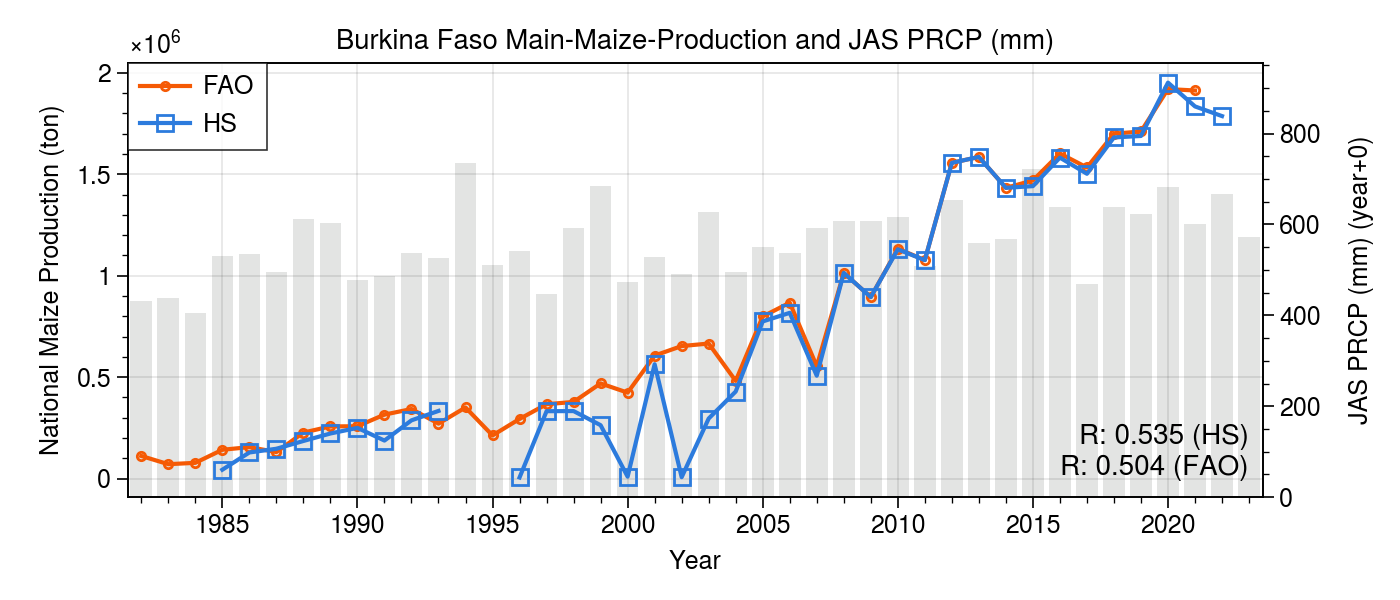

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'Burkina Faso', 'Main', 'Maize', 'Maize (corn)'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'BF2001A0', 7, 'JAS PRCP (mm)', +0
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == country_name) &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1982,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National %s Production (ton)' % product_name_fdw)
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FAO)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FAO','PRCP']), 
    xy=(1, 0.2), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #